In [3]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

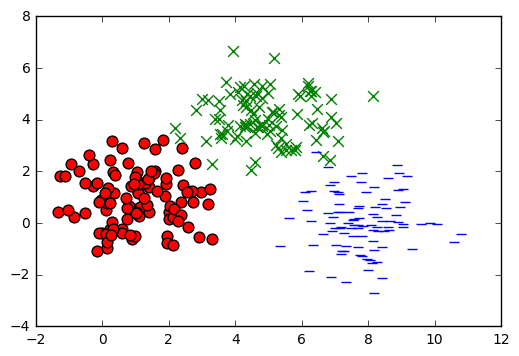

In [9]:
learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

In [11]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))

xs = np.vstack((xs_label0, xs_label1, xs_label2))
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

In [12]:
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

In [16]:
train_size, num_features = xs.shape
train_size, num_features

(300, 2)

In [28]:
X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])

W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.log(y_model))
#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_model, Y))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [30]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    for step in xrange(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        if step % 100 == 0:
            print (step, err)
    
    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print "accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels})

(0, 109.86121)
(100, 8.9357853)
(200, 6.2589278)
(300, 2.0833795)
(400, 6.3026457)
(500, 4.5596762)
(600, 1.2857857)
(700, 5.7028198)
(800, 3.9342897)
(900, 0.96695614)
(1000, 5.4040546)
(1100, 3.5756192)
(1200, 0.78886795)
(1300, 5.2184296)
(1400, 3.3320322)
(1500, 0.67340124)
(1600, 5.089076)
(1700, 3.1511405)
(1800, 0.59182763)
(1900, 4.9923391)
(2000, 3.0091658)
(2100, 0.5308665)
(2200, 4.9164314)
(2300, 2.8934548)
(2400, 0.4834559)
(2500, 4.8547535)
(2600, 2.7965326)
(2700, 0.44547048)
(2800, 4.8032889)
(2900, 2.7136495)
('w', array([[-2.39155388,  0.43808985,  1.9534626 ],
       [-0.8246147 ,  2.50488997, -1.68027389]], dtype=float32))
('b', array([ 11.13378334,  -5.37060213,  -5.76319075], dtype=float32))
accuracy 1.0
